          PL Intensity (kcps)
Time (s)                     
5.71                      4.1
5.72                      4.8
5.73                      4.1
5.74                      4.8
5.75                      3.0


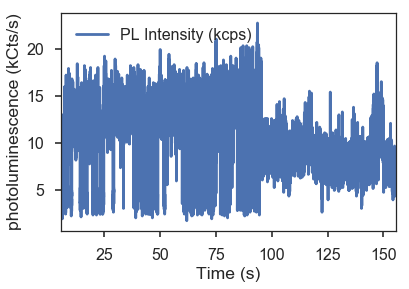

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 27 17:17:43 2018

Blinker analysis

@author: Viva Horowitz
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
sns.set(style='ticks')
sns.set_context('poster')

datadate = '2018-05-31'
datafolder = r'O:\User\Viva\data\2018-05-31_blinking-statistics'
filename = '100HzPLvstime4-21-2018.11,00am.txt'
analysisfolder = r'O:\User\Viva\analysis\blinker_analysis'

os.chdir(datafolder)

tname = 'Time (s)'
PLname = 'PL Intensity (kcps)'

data = pd.read_csv(filename,
                   skiprows=1,
                   header=None,
                   sep='\t',
                   names=['Time (s)','PL Intensity (kcps)'],
                   usecols=[0,1])

data = data.set_index(tname)
print(data.head())

data.plot()
plt.ylabel('photoluminescence (kCts/s)')
plt.show()


os.chdir(analysisfolder)
today = datetime.date.isoformat(datetime.date.today())
if not os.path.exists('taken-' + datadate):
    os.makedirs('taken-' + datadate)
os.chdir('taken-' + datadate)

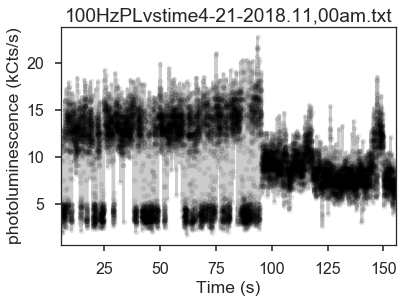

In [2]:
fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)

plt.title(filename)

plt.savefig(today + ',' + filename+'blinking.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'blinking.png', bbox_inches='tight', dpi=200)

plt.show()

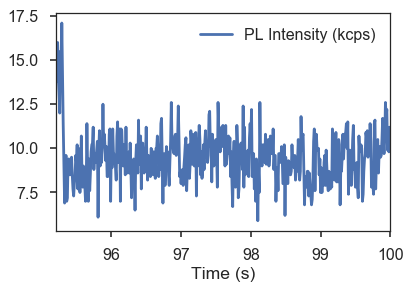

In [3]:
datatrim = data[95.2:100]

datatrim.plot()
plt.show()

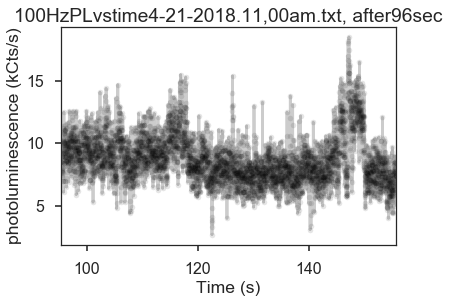

In [4]:
data=data[95.4:]
filename = filename + ', after96sec'

fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)

plt.title(filename)

plt.savefig(today + ',' + filename+'blinking.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'blinking.png', bbox_inches='tight', dpi=200)

plt.show()

In [5]:
# The data was collected at a particular rate
timesetting = data.index[1]-data.index[0]
fps = 1/timesetting
timesetting

0.0099999999999909051

In [6]:
binsequence = np.arange(data.min(), data.max(), fps/350)
len(binsequence)

56

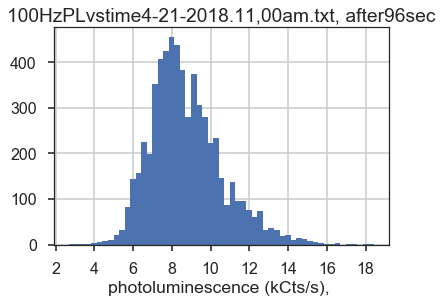

In [37]:
data.hist(bins= binsequence)
plt.xlabel('photoluminescence (kCts/s), ')
plt.locator_params(axis='x', nbins=10)
ax = plt.gca()

plt.title(filename)

# Need to pick an appropriate threshold between on and off. 
uthreshold = 8
lthreshold = uthreshold-.5

#ax.axvline(x=uthreshold, color='k')
#ax.axvline(x=lthreshold, color = 'k')
#ax.tick_params(axis='x',which='minor',bottom='on')
#ax.xaxis.set_minor_locator(minorLocator)
plt.show()

In [8]:
data.head()

,PL Intensity (kcps)
Time (s),
95.40,8.5
95.41,9.3
95.42,8.5
95.43,9.5
95.44,8.5


In [9]:
data.count()

PL Intensity (kcps)    6031
dtype: int64

In [10]:
data.describe()

,PL Intensity (kcps)
count,6031.000000
mean,8.748897
std,1.876617
min,2.700000
25%,7.400000
50%,8.500000
75%,9.800000
max,18.500000


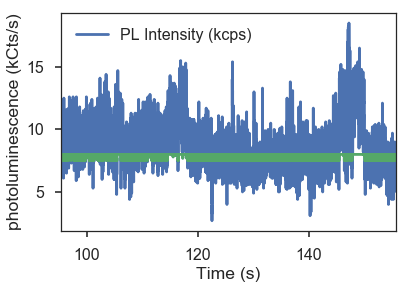

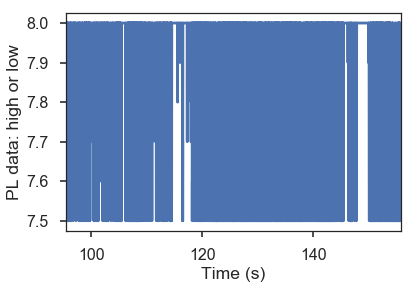

In [11]:
# With an uthreshold and an lthreshold
# This code has an in between status where it won't be counted as remaining in the state 
# but it won't be counted in the other state, either. 
# This seems like the most straightforward way to deal with (rare) cases in between.
# Other options are shown.


threshdata = data[PLname].clip(upper=uthreshold, lower=lthreshold)

data.plot()
plt.ylabel('photoluminescence (kCts/s)')
threshdata.plot()

plt.figure()
threshdata.plot()
plt.ylabel('PL data: high or low')
plt.show()


In [12]:
# Main method: in between status where it won't be counted as remaining in the state 
# but it won't be counted in the other state, either.
downtimes2= threshdata[threshdata != uthreshold].index
uptimes2=threshdata[threshdata != lthreshold].index

print(uptimes2)
print(downtimes2)

Float64Index([  95.4,  95.41,  95.42,  95.43,  95.44,  95.45,  95.47,  95.48,
               95.49,   95.5,
              ...
              155.48, 155.52, 155.53, 155.55, 155.56, 155.57, 155.59,  155.6,
              155.64, 155.68],
             dtype='float64', name=u'Time (s)', length=4378)
Float64Index([ 95.45,  95.46,  95.52,  95.55,  95.59,  95.61,  95.62,  95.63,
               95.67,  95.69,
              ...
               155.6, 155.61, 155.62, 155.63, 155.64, 155.65, 155.66, 155.67,
              155.69,  155.7],
             dtype='float64', name=u'Time (s)', length=2231)


In [13]:
# Alternate option (not used)
uptimes= threshdata[threshdata == uthreshold].index
downtimes=threshdata[threshdata == lthreshold].index

print(uptimes)
print(downtimes)

Float64Index([  95.4,  95.41,  95.42,  95.43,  95.44,  95.47,  95.48,  95.49,
                95.5,  95.51,
              ...
              155.37, 155.41, 155.43, 155.44, 155.46, 155.47, 155.56, 155.57,
              155.59, 155.68],
             dtype='float64', name=u'Time (s)', length=3800)
Float64Index([ 95.46,  95.55,  95.63,  95.67,  95.81,  95.99,  96.13,  96.29,
               96.34,  96.74,
              ...
              155.54, 155.58, 155.61, 155.62, 155.63, 155.65, 155.66, 155.67,
              155.69,  155.7],
             dtype='float64', name=u'Time (s)', length=1653)


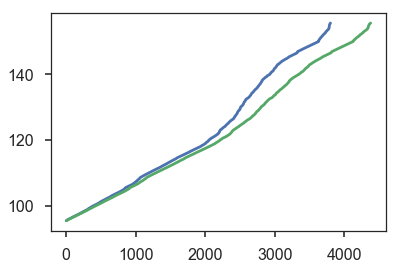

In [14]:
plt.plot(uptimes)
plt.plot(uptimes2)
plt.show()

In [15]:
uptimes[:-1]

Float64Index([  95.4,  95.41,  95.42,  95.43,  95.44,  95.47,  95.48,  95.49,
                95.5,  95.51,
              ...
              155.32, 155.37, 155.41, 155.43, 155.44, 155.46, 155.47, 155.56,
              155.57, 155.59],
             dtype='float64', name=u'Time (s)', length=3799)

In [16]:
uptimes[1:]

Float64Index([ 95.41,  95.42,  95.43,  95.44,  95.47,  95.48,  95.49,   95.5,
               95.51,  95.53,
              ...
              155.37, 155.41, 155.43, 155.44, 155.46, 155.47, 155.56, 155.57,
              155.59, 155.68],
             dtype='float64', name=u'Time (s)', length=3799)

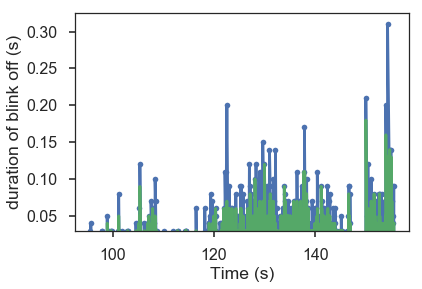

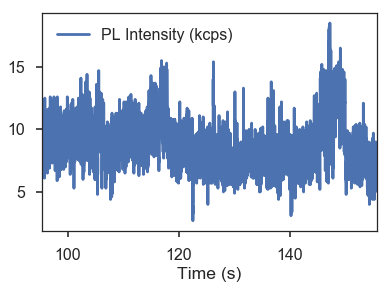

In [17]:
# We can compare the two ways of interpreting blinks.
# There is a discrepancy at about 22 seconds between the two interpretations. 
# It's a matter of whether we consider it stayed off or 
# if we consider that it came up enough to have ended the off blink and began another.
# I tend to think it ended one and began another in this case, so I'm going to use uptimesep2 as my off duration.

# subtracting each time from the last time we had the same state gives the amount of time it was not in that state.
# Therefore the separation between up times is in fact the duration of time off.
uptimesep = uptimes[1:] - uptimes[:-1]
uptimesep2 = uptimes2[1:] - uptimes2[:-1]
plt.plot(uptimes[:-1],uptimesep, '.-')
plt.plot(uptimes2[:-1],uptimesep2, '-')
plt.ylim(ymin=3*timesetting)
#plt.axis('equal')
plt.xlabel(tname)
plt.ylabel('duration of blink off (s)')
plt.figure()
data.plot()
plt.show()

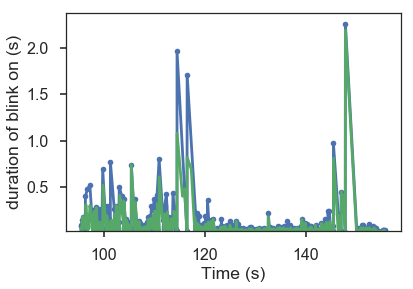

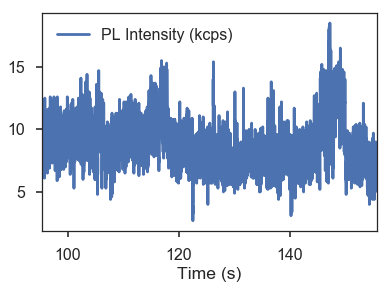

In [18]:
# We can compare the two ways of interpreting blinks. It looks like they mostly agree.

downtimesep = downtimes[1:] - downtimes[:-1]
downtimesep2 = downtimes2[1:] - downtimes2[:-1]
plt.plot(downtimes[:-1],downtimesep,'.-')
plt.plot(downtimes2[:-1],downtimesep2,'-')
plt.ylim(ymin=3*timesetting)
#plt.axis('equal')
plt.xlabel(tname)
plt.ylabel('duration of blink on (s)')
#plt.figure()
data.plot()
plt.show()

In [19]:
downtimesep2

Float64Index([0.00999999999999,             0.06,             0.03,
                          0.04,             0.02,             0.01,
              0.00999999999999,             0.04,             0.02,
                          0.12,
              ...
                          0.02,             0.01, 0.00999999999999,
              0.00999999999999, 0.00999999999999,             0.01,
              0.00999999999999, 0.00999999999999,             0.02,
              0.00999999999999],
             dtype='float64', name=u'Time (s)', length=2230)

In [20]:
# I chose to use downtimesep2 and uptimesep2, as detailed above.

ontimes = filter(lambda a: a > 1.5*timesetting, downtimesep2)
offtimes = filter(lambda a: a > 1.5*timesetting, uptimesep2)

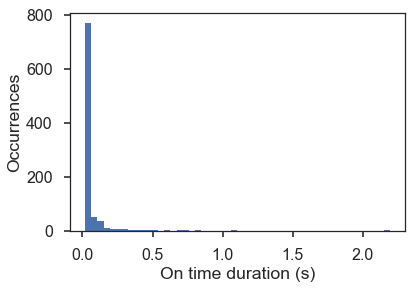

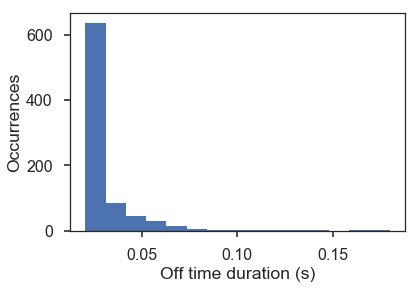

In [21]:
# Choose a nice number of bins to see how the data look.

numonbins = 50
numoffbins = 15

plt.hist(ontimes, bins=numonbins)
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
plt.show()
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
plt.show()

In [22]:
## https://stackoverflow.com/questions/32765333/how-do-i-replicate-this-matlab-function-in-numpy/32765547#32765547

def histc(X, bins):
    map_to_bins = np.digitize(X,bins)
    r = np.zeros(bins.shape)
    for i in map_to_bins:
        r[i-1] += 1
    return [r, map_to_bins]

In [23]:
# http://code.activestate.com/recipes/66472-frange-a-range-function-with-float-increments/
# could also use linspace

def frange(start, end=None, inc=None):
    "A range function, that does accept float increments..."

    if end == None:
        end = start + 0.0
        start = 0.0

    if inc == None:
        inc = 1.0

    L = []
    while 1:
        next = start + len(L) * inc
        if inc > 0 and next >= end:
            break
        elif inc < 0 and next <= end:
            break
        L.append(next)
        
    return L

In [24]:
## I decided to start my bins at 0. 
# This might be different from the built in hist function.

oninc = max(ontimes)/numonbins
onbins= frange(0,max(ontimes)+oninc*3,oninc)
#print(onbins[0:5])


offinc = max(offtimes)/numoffbins
offbins=np.linspace(0,max(offtimes),numoffbins+1)
print("linspace option (not used):")
print(offbins)
offbins= frange(0,max(offtimes),offinc)
print("frange approach:")
print(offbins)
#print(offbins[0:5])
offbins= frange(0,max(offtimes)+offinc*3,offinc)
print("frange approach and pad 3 bins to right (used):")
print(offbins)

centeredonbins = frange(oninc/2,max(ontimes)+oninc*3+oninc/2,oninc)
centeredoffbins= frange(offinc/2,max(offtimes)+offinc*3+offinc/2,offinc)
#centeredoffbins=np.linspace(offinc/2,max(offtimes)+offinc/2,numoffbins)


print('\n')
print(onbins[-5:])
print(centeredonbins[-5:])

print("Make sure ")
print(len(centeredonbins))
print(len(onbins))
print(len(centeredoffbins))
print(len(offbins))

linspace option (not used):
[ 0.     0.012  0.024  0.036  0.048  0.06   0.072  0.084  0.096  0.108
  0.12   0.132  0.144  0.156  0.168  0.18 ]
frange approach:
[0.0, 0.012000000000000455, 0.024000000000000909, 0.036000000000001364, 0.048000000000001819, 0.060000000000002274, 0.072000000000002728, 0.084000000000003183, 0.096000000000003638, 0.10800000000000409, 0.12000000000000455, 0.132000000000005, 0.14400000000000546, 0.15600000000000591, 0.16800000000000637]
frange approach and pad 3 bins to right (used):
[0.0, 0.012000000000000455, 0.024000000000000909, 0.036000000000001364, 0.048000000000001819, 0.060000000000002274, 0.072000000000002728, 0.084000000000003183, 0.096000000000003638, 0.10800000000000409, 0.12000000000000455, 0.132000000000005, 0.14400000000000546, 0.15600000000000591, 0.16800000000000637, 0.18000000000000682, 0.19200000000000728, 0.20400000000000773]


[2.102399999999998, 2.1461999999999981, 2.1899999999999977, 2.2337999999999978, 2.2775999999999978]
[2.124299999999

In [25]:
onhist = histc(ontimes, np.asarray(onbins))
offhist = histc(offtimes, np.asarray(offbins))

In [26]:
onhist

[array([ 692.,  111.,   42.,   20.,    8.,    6.,    3.,    5.,    0.,
           2.,    2.,    1.,    0.,    1.,    0.,    1.,    1.,    0.,
           2.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.]),
 array([ 2,  1,  1,  1,  1,  1,  3,  5,  4,  4,  2,  3,  8,  1,  2,  5,  2,
         4,  7,  6,  1,  1,  2,  4,  1,  1,  1,  6,  1,  3,  7,  1,  1,  1,
         1,  2,  1,  1,  1,  1,  1,  1,  3,  3,  1,  2,  1,  2,  3,  1,  1,
        12,  4,  1,  2,  1,  2,  5,  1,  2,  2,  1,  3,  2,  1,  3,  4,  4,
         3,  2,  3,  1,  5,  2,  2,  1,  7,  1,  1,  1,  2,  1,  3,  1,  3,
        10,  6,  4,  1,  8,  2,  4,  1,  1,  3,  2,  1,  1,  1,  3,  1,  1,
         1,  1,  2,  1,  1,  1, 17,  8,  1,  1,  1,  1,  1,  1,  2,  1,  1,
         1,  1,  1,  1,  3,  1,  1,  1,  1,  1,

In [27]:
offhist

[array([   0.,  477.,  159.,   85.,   48.,   39.,    6.,    3.,    1.,
           3.,    4.,    1.,    0.,    1.,    0.,    1.,    0.,    0.]),
 array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  4,  2,  2,  2,  2,  2,  3,  2,  2,  2,  2,  2,  2,  2,
         2,  5,  2,  3,  2,  2,  2,  2,  2,  2,  3,  3,  2,  2,  2,  2,  2,
         3,  2,  2,  2,  2,  2,  2,  3,  2,  2,  4,  3,  5,  2,  8,  3,  3,
         2,  2,  2,  3,  3,  2,  2,  4,  3,  3,  5,  2,  2,  2,  2,  2,  2,
         2,  3,  2,  2,  4,  3,  6,  2,  2,  2,  2,  3,  4,  2,  2,  2,  5,
         4,  2,  2,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  3,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  3,  3,  3,  2,  3,  3,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  4,  3,  2,  2,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  4,  2,  3,  3,  5,  4,  4,  2,  5,  3,  3,  2,  2,  2,  2,  2,
         2,  2,  2, 

red data are histogram data and black data are shifted to be centered on the bin


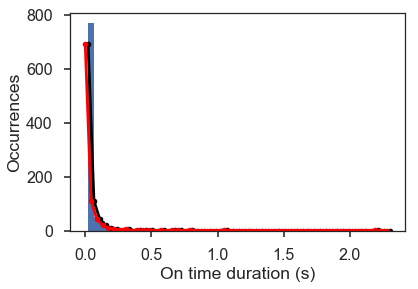

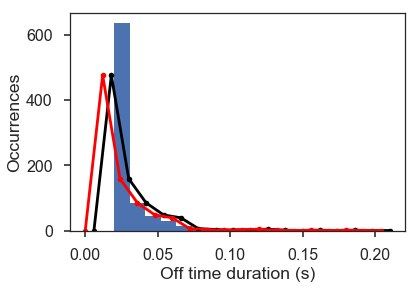

In [28]:
print("red data are histogram data and black data are shifted to be centered on the bin")

#fig, (ax1,ax2) = plt.subplots(2, 1, sharex=False)
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-k')
ax1.plot(onbins,onhist[0],'.-r')
plt.hist(ontimes, bins=numonbins)
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')

# Apparently my digitize and the hist function don't quite give the same output. 
# I think the hist command doesn't start at zero.
# Either way is probably fine.

#plt.yscale('log')
#plt.show()
fig,ax2 = plt.subplots()
ax2.plot(centeredoffbins,offhist[0],'.-k')
ax2.plot(offbins,offhist[0],'.-r')
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax2.set_yscale('symlog')
plt.show()

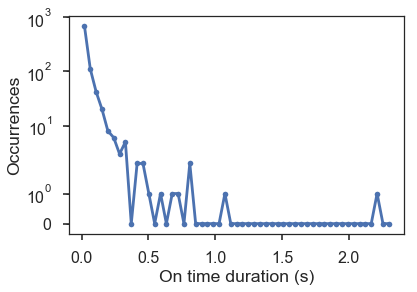

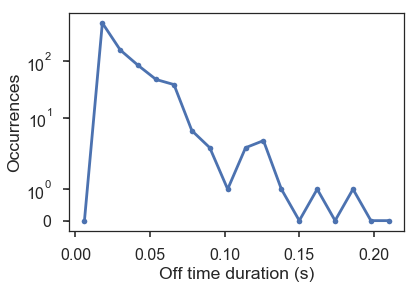

In [29]:
#fig, (ax1,ax2) = plt.subplots(2, 1, sharex=False)
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')

#plt.yscale('log')
#plt.show()
fig,ax2 = plt.subplots()
ax2.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax2.set_yscale('symlog')
plt.show()

In [30]:
from scipy.optimize import curve_fit
import scipy
scipy.__version__
# need at least version 14.0 of scipy.

'0.17.1'

In [31]:
def expfit(t, A, tau):
    return (A * np.exp(t/(-tau)))

# on time fit
onparams, onpcov = curve_fit(expfit, centeredonbins, onhist[0],p0 = (30, 0.8))
onfitx = np.linspace(min(centeredonbins),max(ontimes)+oninc*3,numonbins*5)
onfit = expfit(onfitx,onparams[0],onparams[1])

In [32]:
# Trying to find good guess
#onparams[1]=-.8
#onfit = 30 * np.exp(centeredonbins/(onparams[1]))

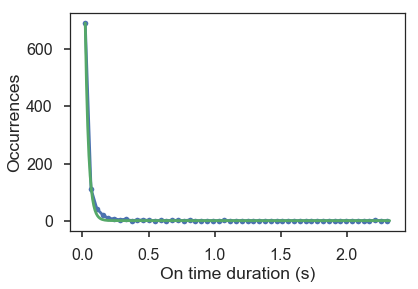

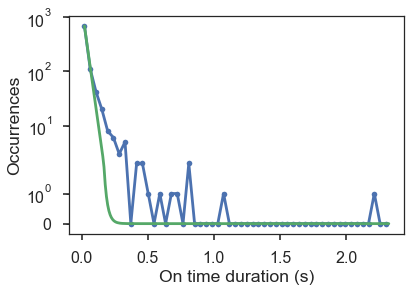

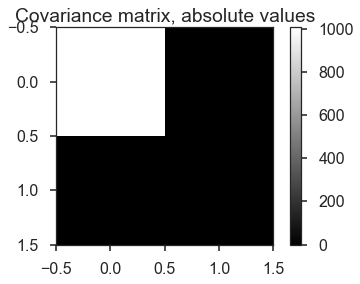

It's ok to use the uncertainties below as long as there aren't strong diagonal values.
Coefficient A = 1658.65127951 ± 31.7434508313
time constant tau = 0.0250177080076 ± 0.000487957830462


In [33]:
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.show()

plt.imshow(abs(onpcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")



print  'Coefficient A = ' + str(onparams[0]) + ' ± ' + str(np.sqrt(onpcov[0,0]))
print 'time constant tau = ' + str(onparams[1]) + ' ± ' + str(np.sqrt(onpcov[1,1]))



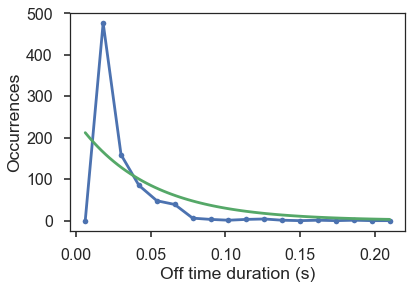

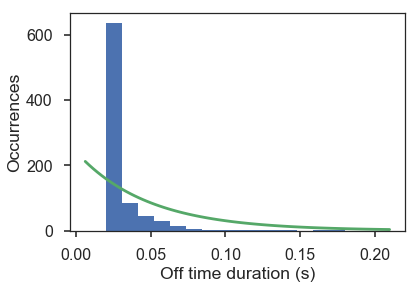

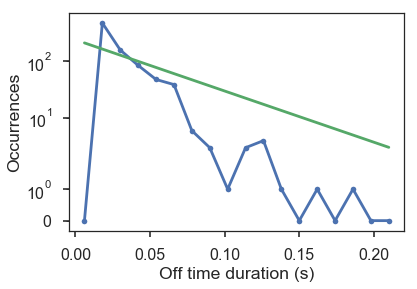

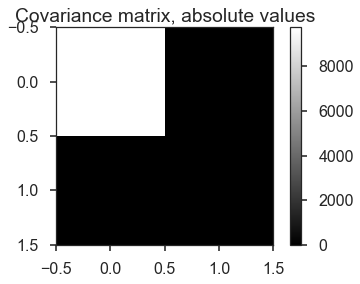

It's ok to use the uncertainties below as long as there aren't strong diagonal values.
Coefficient A = 240.492402592 ± 98.8042856679
time constant tau = 0.0480613595749 ± 0.0278520104079 sec


In [34]:
# off time fit
offparams, offpcov = curve_fit(expfit, centeredoffbins, offhist[0],p0 = (30, 0.8))
offfitx = np.linspace(min(centeredoffbins),max(offtimes)+2.5*offinc,numoffbins*5)
offfit = expfit(offfitx,offparams[0],offparams[1])

# display
fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

fig,ax1 = plt.subplots()
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax1.plot(offfitx,offfit)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

plt.imshow(abs(offpcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")



print  'Coefficient A = ' + str(offparams[0]) + ' ± ' + str(np.sqrt(offpcov[0,0]))
print 'time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec'

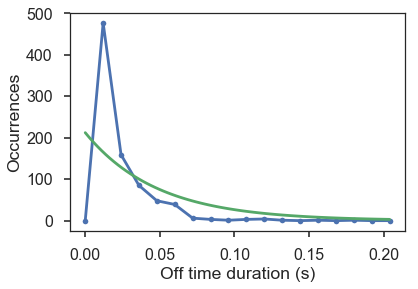

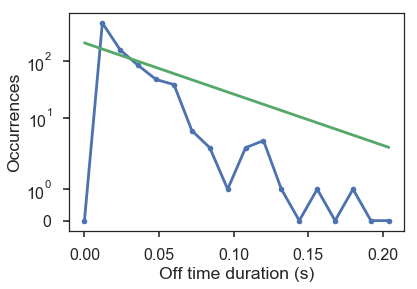

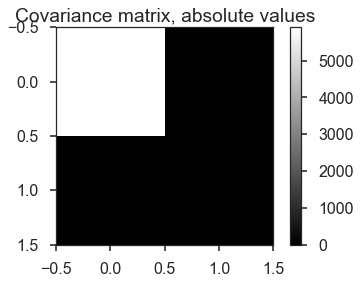

It's ok to use the uncertainties below as long as there aren't strong diagonal values.
Coefficient A = 212.283820947 ± 76.8910554101
time constant tau = 0.0480518623053 ± 0.0278596325235 sec


In [35]:
## I'm not sure whether the bins should be aligned left or center. 
# I already did centered alignment; 
# here's left alignment.
## It turns out it doesn't affect the characteristic time tau.

# off time fit
offparams, offpcov = curve_fit(expfit, offbins, offhist[0],p0 = (30, 0.8))
offfitx = np.linspace(min(offbins),max(offtimes)+2.0*offinc,numoffbins*5)
offfit = expfit(offfitx,offparams[0],offparams[1])

# plot
fig,ax1 = plt.subplots()
ax1.plot(offbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(offbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

plt.imshow(abs(offpcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")



print  'Coefficient A = ' + str(offparams[0]) + ' ± ' + str(np.sqrt(offpcov[0,0]))
print 'time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec'

off time constant tau = 0.0480613595749 ± 0.0278520104079 sec
on time constant tau = 0.0250177080076 ± 0.000487957830462 sec


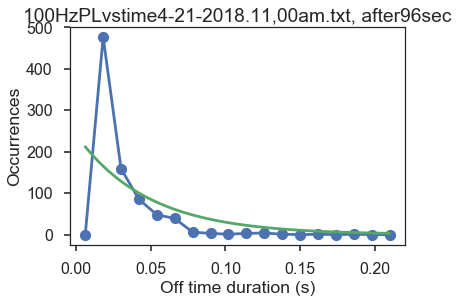

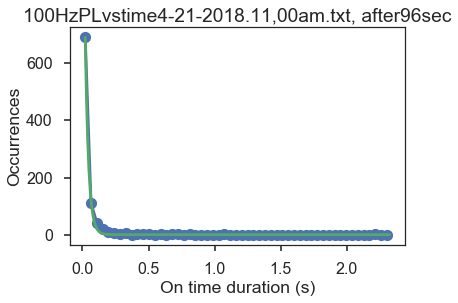

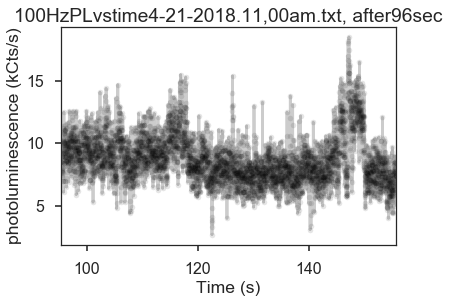

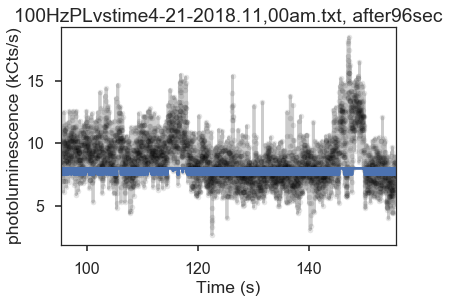

In [36]:
# Save figures

font = {'size'   : 22}

plt.rc('font', **font)

# OFF BLINKS
# off time fit
offparams, offpcov = curve_fit(expfit, centeredoffbins, offhist[0],p0 = (30, 0.8))
offfitx = np.linspace(min(centeredoffbins),max(offtimes)+2.5*offinc,numoffbins*5)
offfit = expfit(offfitx,offparams[0],offparams[1])

# display off blinks
fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'o-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.title(filename)
plt.savefig(today + ',' + filename+'offblinks.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'offblinks.png', bbox_inches='tight', dpi=200)


print 'off time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec'


# On blinks
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'o-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.title(filename)

plt.savefig(today + ',' + filename+'onblinks.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'onblinks.png', bbox_inches='tight', dpi=200)


print 'on time constant tau = ' + str(onparams[1]) + ' ± ' + str(np.sqrt(onpcov[1,1])) + ' sec'

fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)
plt.title(filename)

plt.savefig(today + ',' + filename+'blinking.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'blinking.png', bbox_inches='tight', dpi=200)


fig2,axPL = plt.subplots()
data.plot(marker='.',linestyle='None',legend=False, alpha=0.1, ax=axPL, color='k')
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
threshdata.plot(legend=False)
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)
plt.title(filename)

plt.savefig(today + ',' + filename+'blinkingandthreshold.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'blinkingandthreshold.png', bbox_inches='tight', dpi=200)


plt.show()